In [ ]:
#Changed data: 88

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import copy
from operator import itemgetter
import numpy as np
import missingno as msno

df = pd.read_csv('all_data.csv')



In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Article_name                    1011 non-null   object 
 1   Figure_number                   1011 non-null   object 
 2   Sample_name                     1011 non-null   object 
 3   Total_surface_area[m2/g]        928 non-null    float64
 4   Total_pore_volume[cm3/g]        778 non-null    float64
 5   Micropore_volume[cm3/g]         730 non-null    float64
 6   Mesopore_volume[cm3/g]          21 non-null     float64
 7   Average_pore_diameter[nm]       121 non-null    float64
 8   Impregnation_ratio[agent/char]  20 non-null     float64
 9   Activation_type                 33 non-null     object 
 10  Burn_off[%]                     75 non-null     float64
 11  Carbonization_time[h]           210 non-null    float64
 12  Carbonization_temperature[stC]  25

<Axes: >

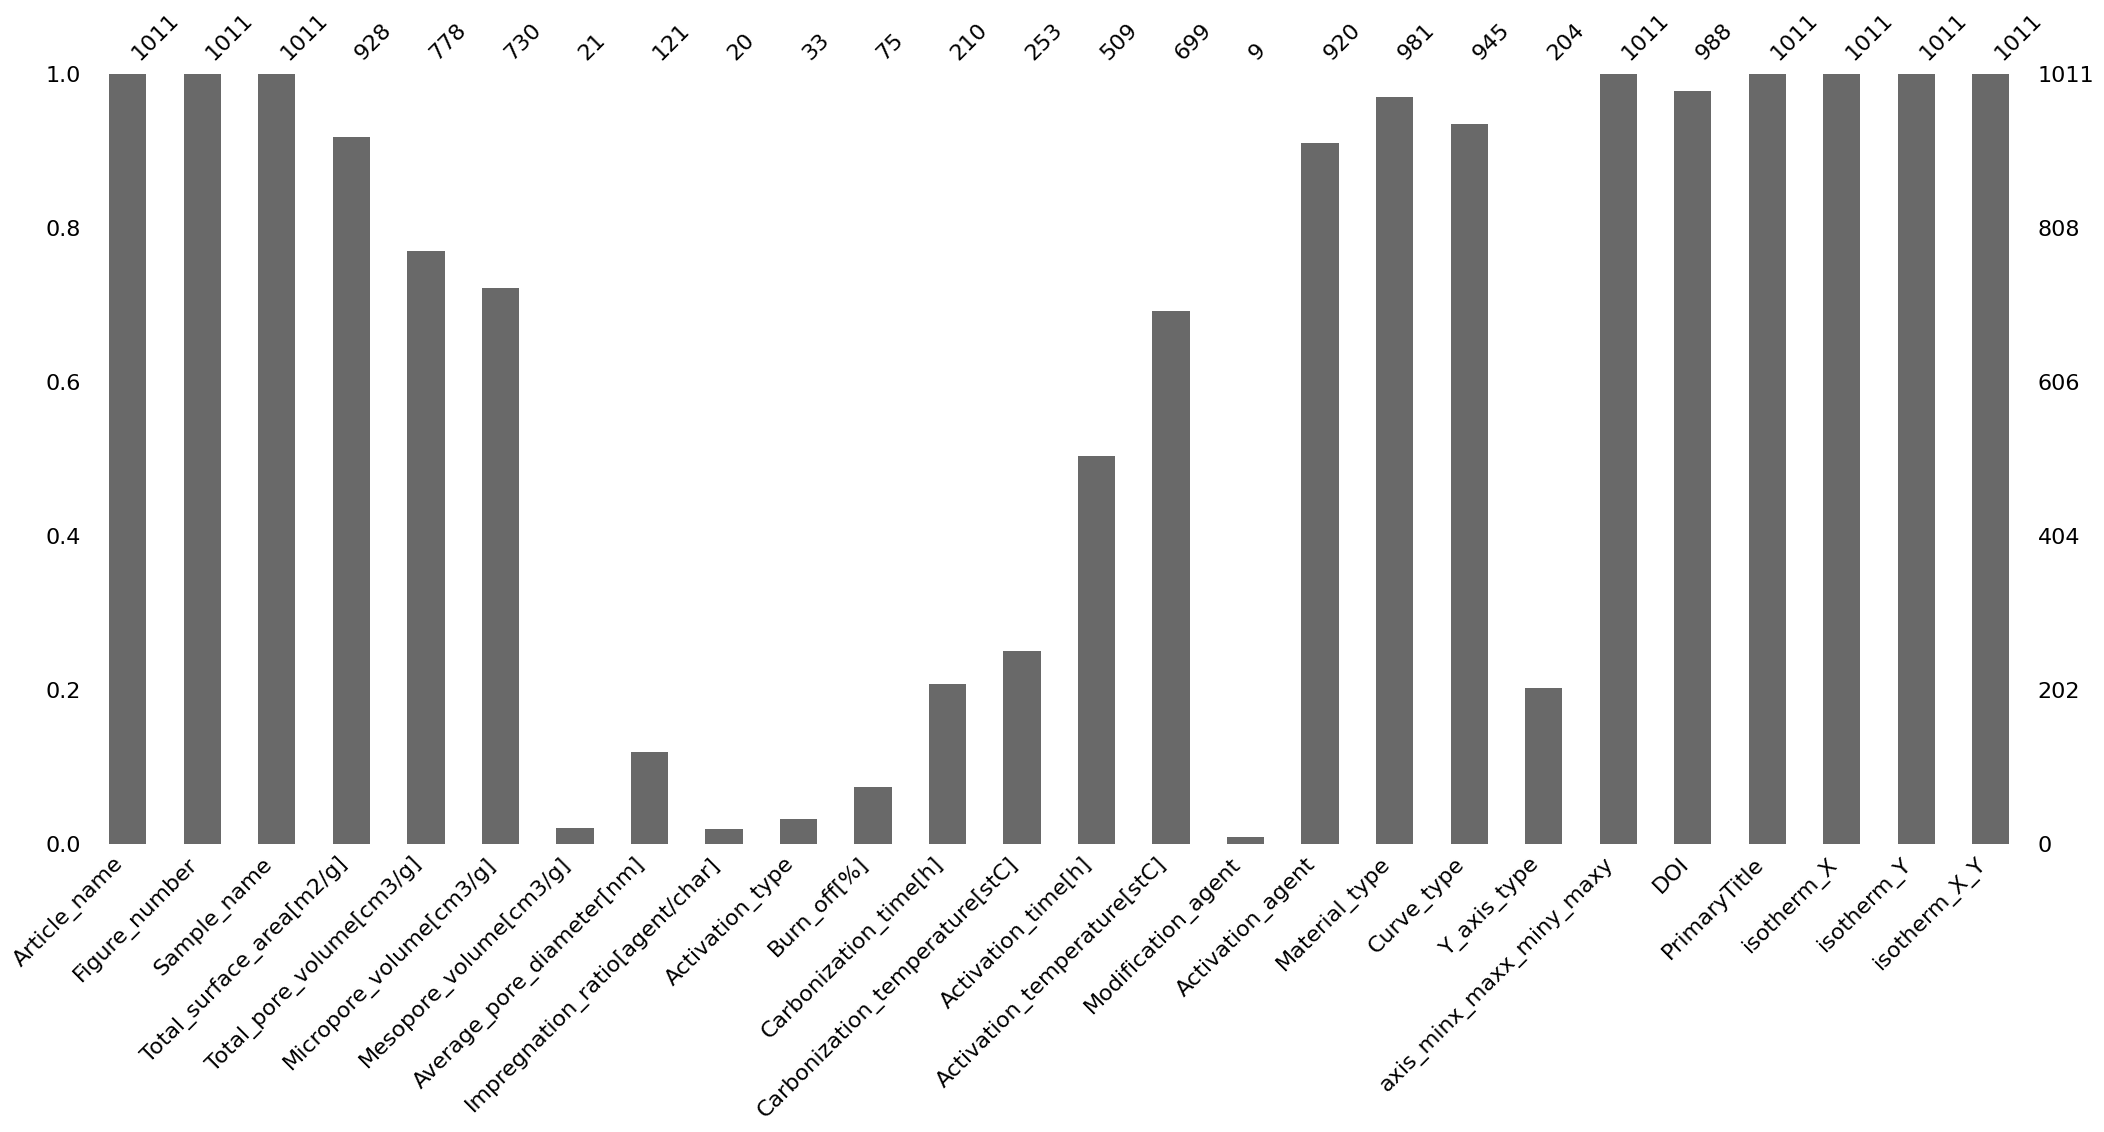

In [4]:
msno.bar(df) 

Material_type
pitch                     47
coconut_shells            44
resin                     43
acrylic_textile_fibres    33
coal                      28
                          ..
paulownia_wood             1
cluster_stalks             1
sargassum                  1
bagasse                    1
babassu_coconut            1
Name: count, Length: 115, dtype: int64
pitch
coconut_shells
resin
acrylic_textile_fibres
coal
almond_shells
peanut_hulls
polyacrylonitrile
naphtha_cracking_bottom
bamboo
cococut_shell
Rice_straws
blue_green_algae
polymeric_fibres
hemp_stem
sugarcane_bagasse
rice_husk
anthracite
discard_coal
eucalyptus_lignin
peach_stone
coal_tar_pitch
oil_palm_shells
phenol_formaldehyde_resins
stipa_tenacissima_leaves
potato_waste
oil_palm_shell
lignin
poplar_wood
macadamia_nut_shell
spent_ground_coffee
bean_dreg
orange_peel
oil_palm_male_flowers
fir_wood
olive_stones
grain_sorghum
cork
cotton_stalks
phenolic_resins
bituminous_coal
anthracite_coal
municipal_waste
coffee_husk


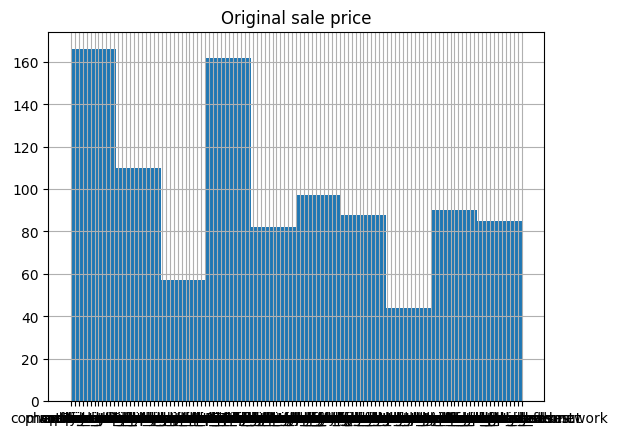

In [5]:
material_counts = df['Material_type'].value_counts()

print(material_counts)

unique_materials = material_counts.index.tolist()
for material in unique_materials:
    print(material)
# print(unique_materials)

df['Material_type'].hist()
plt.title("Material_type")
plt.show()


Activation_agent
KOH                            269
CO2                            216
H3PO4                          102
ZnCl2                           77
steam_activated                 54
NaOH                            29
K2CO3                           15
KOH_CO2                         14
carbonization                   14
NaOH_H3PO4                      13
H2SO4_ZnCl2                     13
nitrogen                         9
ZnCl2_CO2                        8
without                          7
N2                               6
HNO3                             6
polyfurfuryl_alcohol             5
H2SO4_CO2                        5
H2SO4                            5
CO2_steam                        5
KCl                              4
NaHCO3                           4
superheated_steam_microwave      4
AgNO3                            4
Zn(CH3CO2)2                      4
pyridine                         3
(NH4)2HPO4                       3
microwave                        3
CO2

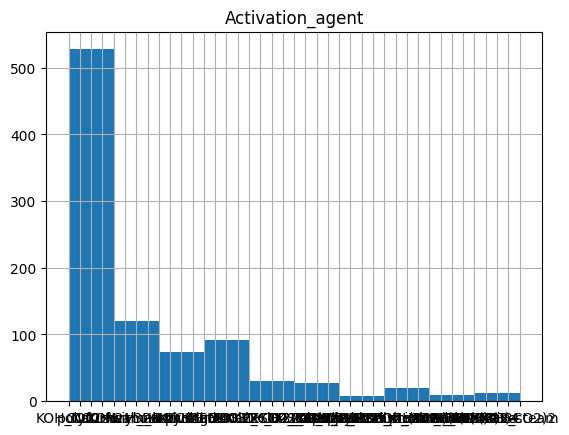

In [7]:
activat_agent__counts = df['Activation_agent'].value_counts()

print(activat_agent__counts)

unique_materials = activat_agent__counts.index.tolist()
for material in unique_materials:
    print(material)


df['Activation_agent'].hist()
plt.title("Activation_agent")
plt.show()



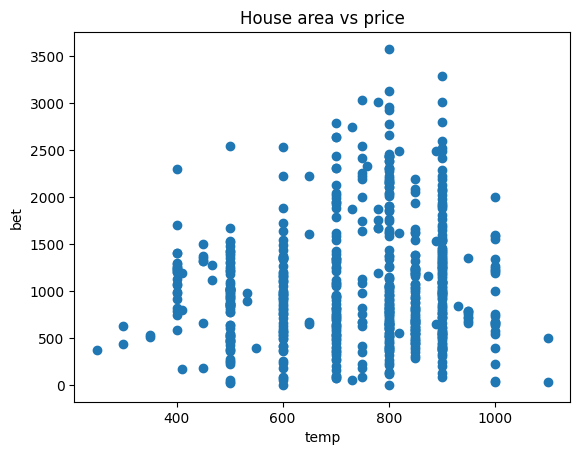

Article_name                                                                  Data1
Figure_number                                                                     1
Sample_name                                                                  AC0520
Total_surface_area[m2/g]                                                      262.0
Total_pore_volume[cm3/g]                                                     0.2293
Micropore_volume[cm3/g]                                                         NaN
Mesopore_volume[cm3/g]                                                       0.1263
Average_pore_diameter[nm]                                                     3.501
Impregnation_ratio[agent/char]                                                  NaN
Activation_type                                                                 NaN
Burn_off[%]                                                                     NaN
Carbonization_time[h]                                                       

In [48]:
df_filtered = df.dropna(subset=['Activation_temperature[stC]', 'Total_surface_area[m2/g]'])

plt.scatter(df_filtered["Activation_temperature[stC]"], df_filtered["Total_surface_area[m2/g]"])
plt.title("House area vs price")
plt.xlabel("temp")
plt.ylabel("bet")
plt.show()

# df_filtered[0]

first_row = df_filtered.iloc[0]
print(df_filtered.iloc[0])

Curve_type
I        558
I_IV     112
I_II     102
II        90
IV        79
II_IV      4
Name: count, dtype: int64


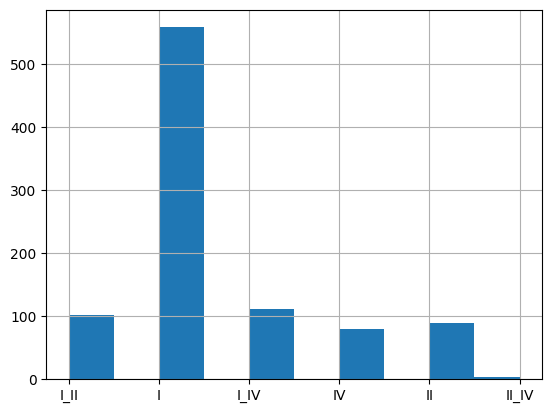

In [34]:
df["Curve_type"].hist()
types_counts = df['Curve_type'].value_counts()
print(types_counts)

1011


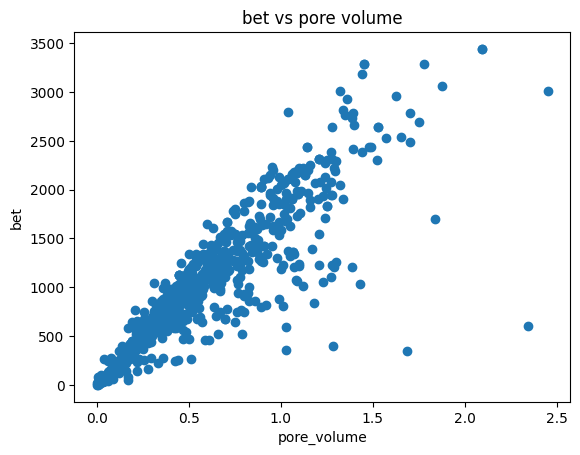

In [41]:
df_filtered = df.dropna(subset=['Total_surface_area[m2/g]', 'Total_pore_volume[cm3/g]'])
print(len(df))
plt.scatter( df_filtered["Total_pore_volume[cm3/g]"],df_filtered["Total_surface_area[m2/g]"])
plt.title("bet vs pore volume")
plt.ylabel("bet")
plt.xlabel("pore_volume")
plt.show()

In [ ]:
average_Y = df['isotherm_Y'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else None)
bet = df['Total_surface_area[m2/g]']


plt.scatter(average_Y, bet, color='blue', label='Dane')
plt.title('Zaleznosc powierzchni wlasciwej od  średniej wartości ilosci zaabsorbowanego gazu')
plt.xlabel('średnia y value [cm3/g]')
plt.ylabel('BET value [m2/g]')
# plt.legend()
plt.show()

In [ ]:
x1 = df['isotherm_X'][0]
y1 = df['isotherm_Y'][0]
ig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[1].scatter(x1, y1, c='r', label='Dane 1')
axs[1].set_title(f'New size: ')
plt.tight_layout()
plt.show()

# for index, isotherm in enumerate(X):
#     print(f"{info[index][0]}  ->  BET: {y[index]}  dla  y_max: {isotherm[-1][1]}              name: {info[index][1]}  graph: {info[index][2]}")
#     # print(f"No: {index} |  BET: {y_2[index]}  |  points:{len(isotherm)} | {info[index]}")
#     x1 = isotherm[:, 0]
#     y1 = isotherm[:, 1]
    
#     oryg = np.array(oryginal_isotherms[index])
#     x2 = oryg[:, 0]
#     y2 = oryg[:, 1]
    
#     fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
#     axs[1].scatter(x1, y1, c='r', label='Dane 1')
#     axs[1].set_title(f'New size: {len(isotherm)}')
    
    
#     axs[0].scatter(x2, y2, c='b', label='Dane 2')
#     axs[0].set_title(f'Oryginal size: {len(oryg)} | name: {info[index][1]}')
#     axs[0].text(0.15, 0.95, f'BET:   {y[index]}', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
    
    
#     plt.tight_layout()
#     plt.show()